In [6]:
import numpy as np
import astropy.table
% matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [2]:
mydata = 'electronictable_sourceproperties.txt'
ludata = 'l1688deliveryobjecttable.tbl'

In [3]:
art  = astropy.table.Table.read(mydata, format='ascii')
lu = astropy.table.Table.read(ludata, format='ascii')
art['SSTYSV_J'] = [s[8:] for s in art['IAU_NAME']]
m = astropy.table.join(art, lu, keys='SSTYSV_J')

## Find sources that are only in one of the catalogs

In [4]:
# Print object that are in my able, but not in Luisa's
set(art['SSTYSV_J']) - set(lu['SSTYSV_J'])

{'162613.49-243111.5',
 '162616.75-242956.2',
 '162616.84-242223.1',
 '162617.79-242113.4',
 '162618.69-242157.5',
 '162621.01-241541.4',
 '162621.75-242326.0',
 '162623.13-241338.0',
 '162625.94-242104.5',
 '162626.22-241650.8',
 '162628.99-242724.8',
 '162634.45-241657.0',
 '162635.42-241655.1',
 '162638.47-241827.4',
 '162714.49-242646.0',
 '162714.85-244604.6',
 '162715.17-242852.8',
 '162716.53-242209.8',
 '162716.75-244823.8',
 '162717.04-242201.2',
 '162717.76-242007.6',
 '162717.88-244956.8',
 '162717.89-242121.2',
 '162718.05-242031.9',
 '162718.13-242021.4',
 '162718.58-244840.8',
 '162719.13-244811.2',
 '162721.69-241934.4',
 '162721.92-244713.6',
 '162722.18-242044.6',
 '162722.61-243414.6',
 '162723.41-245008.2',
 '162723.86-242013.9',
 '162723.96-244808.8',
 '162724.74-241916.8',
 '162725.39-243251.6',
 '162725.63-243728.6',
 '162726.65-242052.3',
 '162727.48-242535.3',
 '162727.48-243732.2',
 '162727.94-243709.8',
 '162728.49-243549.9',
 '162729.42-244021.1',
 '162731.78

In [5]:
# Print objects that are in Luisa's table, but not in mine
set(lu['SSTYSV_J']) - set(art['SSTYSV_J'])

{'162612.78-243116.3',
 '162726.90-243110.5',
 '162730.49-244126.6',
 '162739.53-244017.5'}

I expected some differences, because Luisa used the imrpoved cleaning of lightcurves, but this is almost 10 %. Maybe that's OK, but I wanted to call that out so we can talk about it.
From here on, I'll only use the sources that I find in both catalogs.

## A note about the following plots

All the foloowing plots are interactive:
- In one of the bottom corners there are little tools tha allow you to pan and zoom.
- Every datapoint hasa tooltip associated. Hover your mouse over them to identify an object.

In [7]:
# Make a list of strings that represent derived properties 
moritz = ['min', 'max', 'mean','stddev','delta','redchi2tomean']
luisa = ['min', 'max', 'mean', 'sdev', 'ampl', 'chis']

In [21]:
def plot_diff(data, col_moritz, col_luisa):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(m['means1_36'], m[col_moritz] - m[col_luisa])
    ax.set_xlabel('Mean I1 magnitude')
    ax.set_ylabel('Difference Moritz - Luisa [mag]')
    ax.set_title('{0} - {1}'.format(col_moritz, col_luisa))
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=list(m['SSTYSV_J']))
    mpld3.plugins.connect(fig, tooltip)

## Compare fast cadence derived properties for 3.6 mu

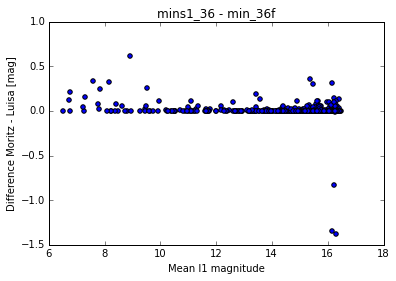

In [23]:
plot_diff(m, 'mins1_36', 'min_36f')

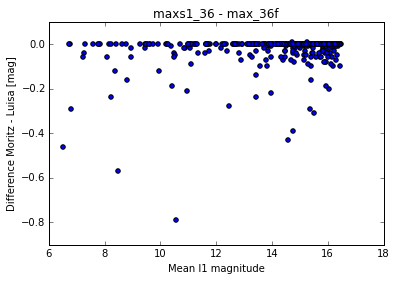

In [24]:
plot_diff(m, 'maxs1_36', 'max_36f')

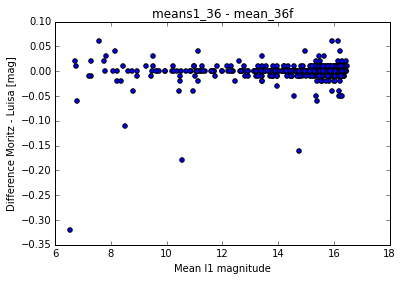

In [25]:
plot_diff(m, 'means1_36', 'mean_36f')

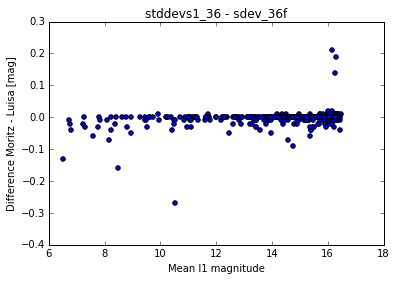

In [26]:
plot_diff(m, 'stddevs1_36', 'sdev_36f')

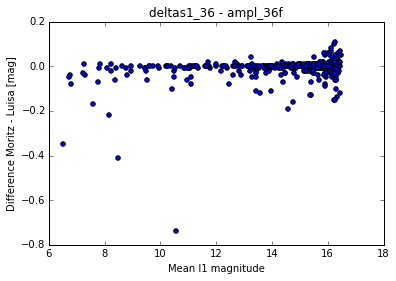

In [27]:
plot_diff(m, 'deltas1_36', 'ampl_36f')

My understanding it that Luisa only changed a couple of data points and those mostly for the faint sources. Yet, I see significant differences for a larger number of sources, even for bright ones, e.g. the mean mag differs by > 0.2 mag for a handful of sources brigther than 12 mag. (Hoover over the datapoints above to see which one). How can that be?

## Compare fast cadence derived properties for 4.5 mu

I've looked at the I2 data and the level of agreement / disagreement is very similar. I can make those plots here, but unless you ask me for it, I'll save the space.

## Same thing for all data points (not just fast cadence)

Again, I've looked at that and the general level of agreement is very similar, so I'll save you the effort of looking over them, too.